In [3]:
import mido
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

# tf.compat.v1.enable_eager_execution()

In [4]:
mid1 = mido.MidiFile('satie.mid')
mid2 = mido.MidiFile('prokofiev.mid')

In [5]:
def midi2arr(messages):
    l = []
    
    for m in messages:
        if m.type == 'note_on' and m.velocity > 0:
            l.append([m.note, m.velocity])
    
    a = np.array(l, dtype=float)
    a[...,0] /= 127
    a[...,1] /= 127 
            
    return a

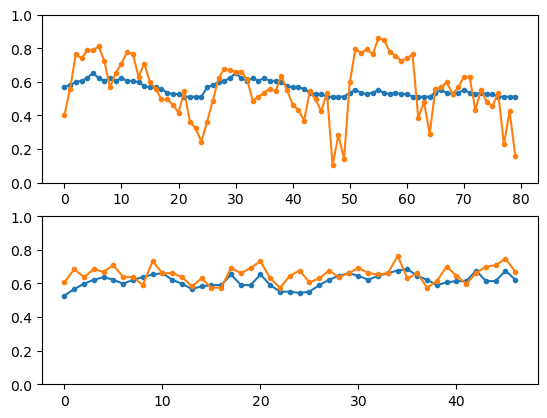

In [6]:
midivel1 = midi2arr(mid1)
midivel2 = midi2arr(mid2)

figure, axis = plt.subplots(2, 1)

axis[0].plot(midivel1, '.-')
axis[0].set_ylim([0, 1])
axis[1].plot(midivel2, '.-')
axis[1].set_ylim([0, 1])

plt.show()

In [10]:
def plot_res(pred, content, style):
    plt.plot(pred, label='result')
    plt.plot(content, label='content')
    plt.plot(style, label='style')
    
    plt.legend()
    plt.show()

In [17]:
A = 0
B = 0
C = 1

In [18]:
def style_loss(pred, style):    
    return tf.math.abs(tf.math.reduce_std(pred) - tf.math.reduce_std(style))

def content_loss(pred, content):
    return tf.math.reduce_mean(tf.math.square(pred - content))

def quality_loss(pred):
    return predict(pred[:16])

def overall_loss(pred, content, style):
    return A * style_loss(pred, style) + B * content_loss(pred, content) + C * quality_loss(pred)

In [19]:
@tf.function()
def train_step(vel):
    with tf.GradientTape() as tape:
        loss = overall_loss(vel, content, style)

    grad = tape.gradient(loss, vel)
    opt.apply_gradients([(grad, vel)])

In [23]:
content = midivel2[...,1]
style = midivel1[...,1]
print(vel)

<tf.Variable 'Variable:0' shape=(47,) dtype=float64, numpy=
array([0.60629921, 0.68503937, 0.63779528, 0.68503937, 0.66929134,
       0.70866142, 0.63779528, 0.63779528, 0.59055118, 0.73228346,
       0.66141732, 0.66141732, 0.63779528, 0.58267717, 0.62992126,
       0.57480315, 0.57480315, 0.69291339, 0.66141732, 0.69291339,
       0.73228346, 0.62992126, 0.57480315, 0.64566929, 0.67716535,
       0.60629921, 0.62992126, 0.67716535, 0.63779528, 0.66141732,
       0.69291339, 0.66141732, 0.65354331, 0.66141732, 0.76377953,
       0.62992126, 0.66141732, 0.57480315, 0.61417323, 0.7007874 ,
       0.64566929, 0.5984252 , 0.66141732, 0.7007874 , 0.70866142,
       0.7480315 , 0.66929134])>


In [21]:
opt = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

In [22]:
import time
start = time.time()

epochs = 5
steps_per_epoch = 200

step = 0
for n in range(epochs):
    for m in range(steps_per_epoch):
        step += 1
        train_step(vel)
    print(".", end='', flush=True)
    plot_res(vel.numpy(), content, style)
    print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))

ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 48 but received input with shape (47, 1)